In [1]:
import pandas as pd
df=pd.read_csv('telco_churn_with_all_feedback.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PromptInput,CustomerFeedback
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Write a realistic customer feedback based on t...,I have been using the DSL internet service fro...
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Write a realistic customer feedback based on t...,I have been a customer with this company for o...
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Write a realistic customer feedback based on t...,I recently signed up for DSL internet service ...
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Write a realistic customer feedback based on t...,I have been a loyal customer with this company...
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Write a realistic customer feedback based on t...,I recently switched to this fiber optic intern...


In [2]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
PromptInput         0
CustomerFeedback    0
dtype: int64

In [3]:
df=df.drop(['customerID','PromptInput','CustomerFeedback'], axis=1)

In [4]:
# 找出字串欄位
obj_cols = df.select_dtypes(include='object').columns

# 去前後空白、轉小寫（casefold 比 lower 更穩）
df[obj_cols] = df[obj_cols].apply(lambda s: s.str.strip().str.casefold())


In [5]:
#把「no internet service / no phone service」先視為 no。
df[obj_cols] = df[obj_cols].replace({
    'no internet service': 'no',
    'no phone service': 'no',
})



In [6]:
# 找出 yes/no 欄位
pure_yes_no_cols = [
    c for c in df.columns
    if set(pd.Series(df[c]).dropna().unique()) <= {'yes', 'no'}
]


In [7]:
# 先保險：再清一次 yes/no（不會有壞處）
clean = df[pure_yes_no_cols].apply(lambda s: s.astype('string').str.strip().str.casefold())

# yes/no → 1/0，再轉成可空整數 Int64（NaN 也能存）
num = clean.apply(lambda s: s.map({'yes': 1, 'no': 0}))
df[pure_yes_no_cols] = num.astype('Int64')

# 快速檢查
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,1,0,1,0,0,dsl,0,1,0,0,0,0,month-to-month,1,electronic check,29.85,29.85,0
1,male,0,0,0,34,1,0,dsl,1,0,1,0,0,0,one year,0,mailed check,56.95,1889.5,0
2,male,0,0,0,2,1,0,dsl,1,1,0,0,0,0,month-to-month,1,mailed check,53.85,108.15,1
3,male,0,0,0,45,0,0,dsl,1,0,1,1,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0
4,female,0,0,0,2,1,0,fiber optic,0,0,0,0,0,0,month-to-month,1,electronic check,70.70,151.65,1


In [8]:
#性別 -> 1/0
df['gender'] = df['gender'].map({'male': 1, 'female': 0}).astype('Int64')
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,dsl,0,1,0,0,0,0,month-to-month,1,electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,dsl,1,0,1,0,0,0,one year,0,mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,dsl,1,1,0,0,0,0,month-to-month,1,mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,dsl,1,0,1,1,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,fiber optic,0,0,0,0,0,0,month-to-month,1,electronic check,70.70,151.65,1


In [9]:
#One-Hot Encoding
df = pd.get_dummies(df, columns=['InternetService'], drop_first=True,dtype='uint8')
df = pd.get_dummies(df, columns=['Contract'], drop_first=True,dtype='uint8')
df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True,dtype='uint8')

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_fiber optic,InternetService_no,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [11]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) == 0:
    print("✅ 所有欄位都是數值型態，可以直接建模")
else:
    print("⚠ 仍有非數值欄位：", list(non_numeric_cols))


⚠ 仍有非數值欄位： ['TotalCharges']


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [13]:
print(df['TotalCharges'].dtype)  # 應該是 float64 或 int64
print(df['TotalCharges'].head())


float64
0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64


In [14]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) == 0:
    print("✅ 所有欄位都是數值型態，可以直接建模")
else:
    print("⚠ 仍有非數值欄位：", list(non_numeric_cols))

✅ 所有欄位都是數值型態，可以直接建模


C:\Users\USER\AppData\Local\Temp\ipykernel_8336\149699116.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive.values, y=top_positive.index, palette="Reds_r")


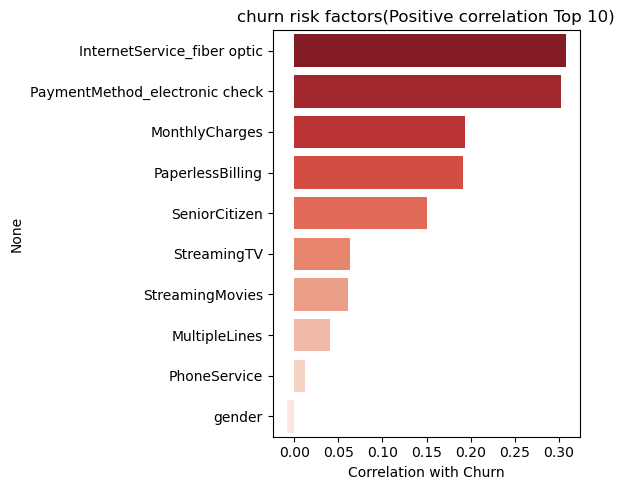

C:\Users\USER\AppData\Local\Temp\ipykernel_8336\149699116.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative.values, y=top_negative.index, palette="Blues")


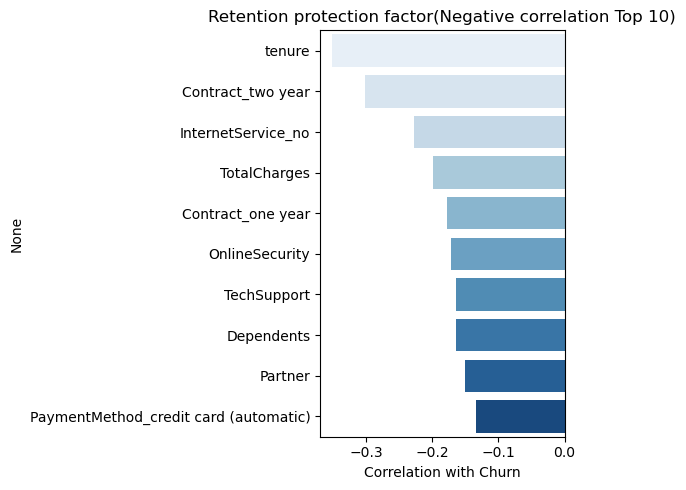

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
target = 'Churn'
N = 10  # 想顯示前幾名

# 計算與目標的相關
corr_to_target = df.corr(numeric_only=True)[target].drop(target)

# 分成正相關 Top N 與負相關 Top N
top_positive = corr_to_target.sort_values(ascending=False).head(N)
top_negative = corr_to_target.sort_values(ascending=True).head(N)

# 畫正相關 Top N
plt.figure(figsize=(6, 5))
sns.barplot(x=top_positive.values, y=top_positive.index, palette="Reds_r")
plt.title(f"churn risk factors(Positive correlation Top {N})")
plt.xlabel("Correlation with Churn")
plt.tight_layout()
plt.show()

# 畫負相關 Top N
plt.figure(figsize=(6, 5))
sns.barplot(x=top_negative.values, y=top_negative.index, palette="Blues")
plt.title(f"Retention protection factor(Negative correlation Top {N})")
plt.xlabel("Correlation with Churn")
plt.tight_layout()
plt.show()



In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

mask_na = df['TotalCharges'].isna()

# 1) tenure==0 的缺失，補 0
df.loc[mask_na & (df['tenure'] == 0), 'TotalCharges'] = 0

# 2) 其他缺失（若仍有），用 MonthlyCharges * tenure 估
mask_na2 = df['TotalCharges'].isna()
df.loc[mask_na2, 'TotalCharges'] = df.loc[mask_na2, 'MonthlyCharges'] * df.loc[mask_na2, 'tenure']

# 檢查
print('缺失數(修正後)：', df['TotalCharges'].isna().sum())


缺失數(修正後)： 0


In [17]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy: 0.808374733853797

Confusion Matrix:
 [[936 108]
 [162 203]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1044
         1.0       0.65      0.56      0.60       365

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test, y_pred_knn)
confusion=confusion_matrix(y_test,y_pred_knn)
report=classification_report(y_test,y_pred_knn)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy: 0.7608232789212207

Confusion Matrix:
 [[879 165]
 [172 193]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1044
         1.0       0.54      0.53      0.53       365

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409



c:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系統找不到指定的檔案。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\USER\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
          

Accuracy: 0.7920511000709723

Confusion Matrix:
 [[887 157]
 [136 229]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1044
         1.0       0.59      0.63      0.61       365

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.80      0.79      0.79      1409



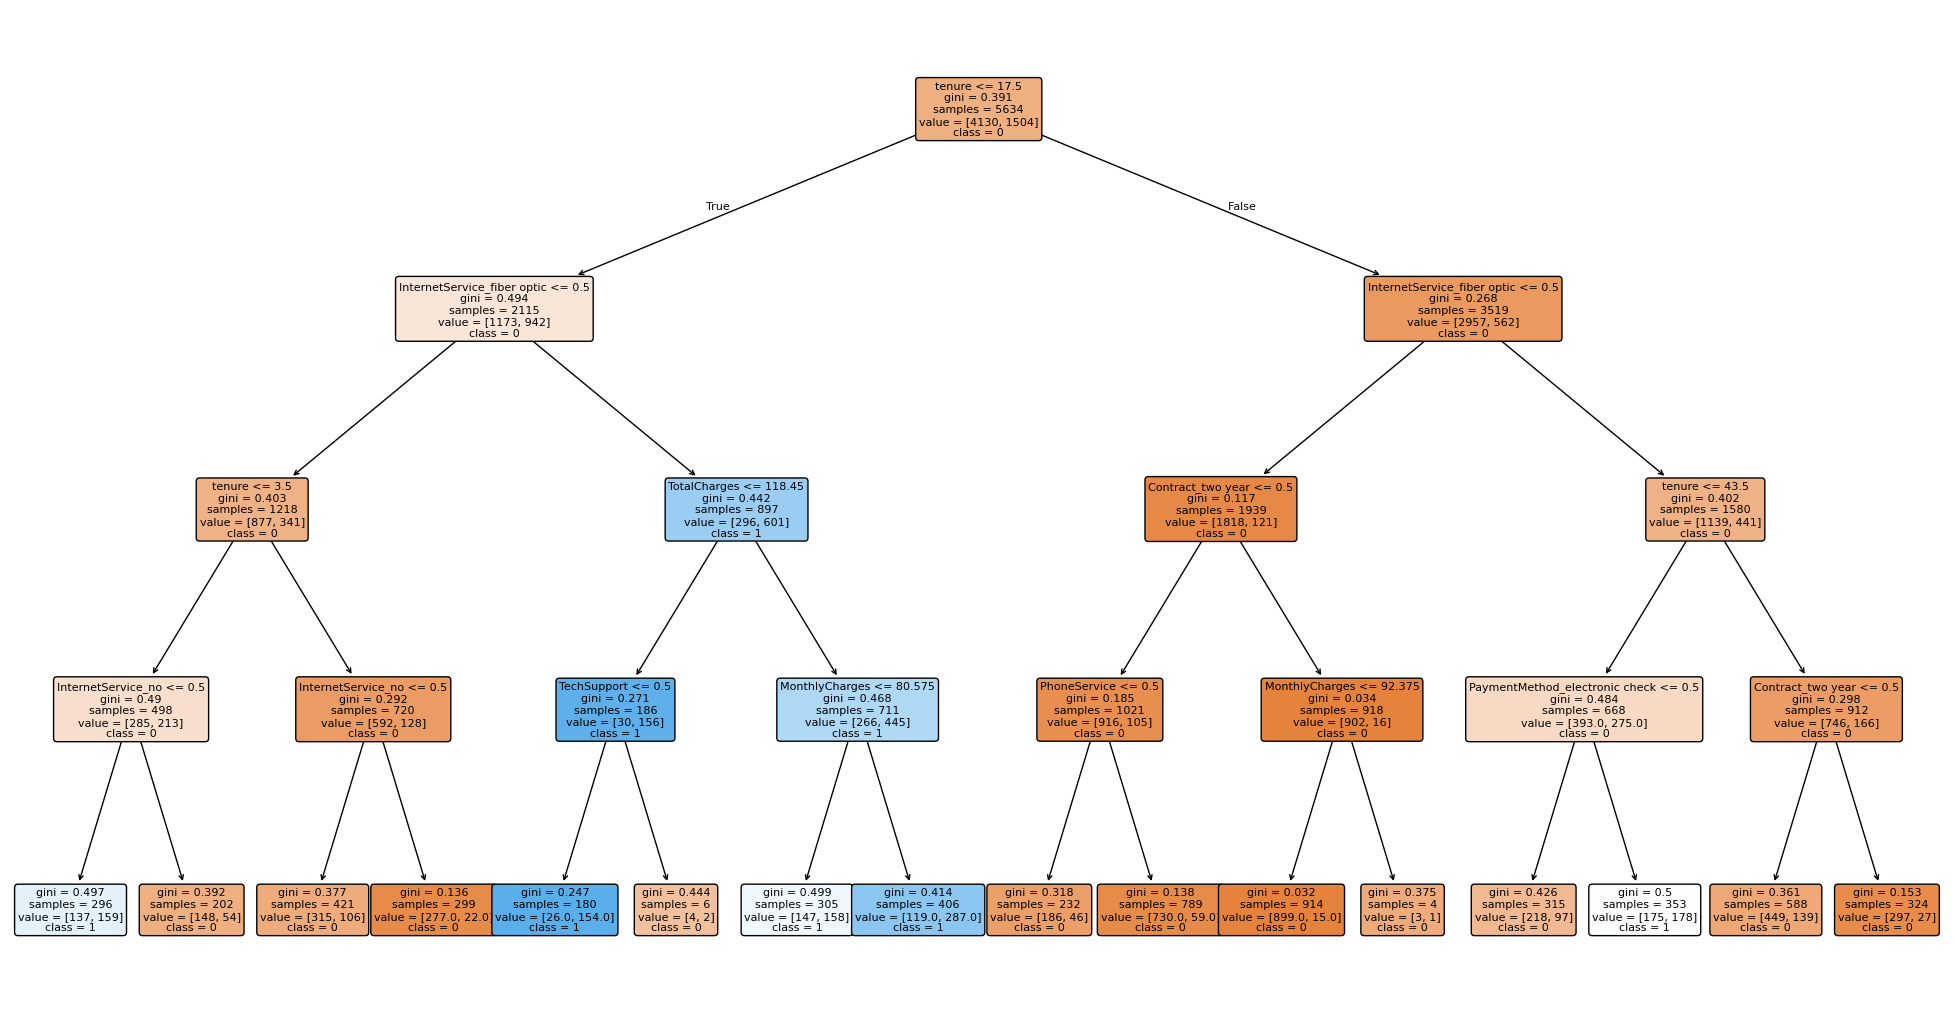

<Axes: >

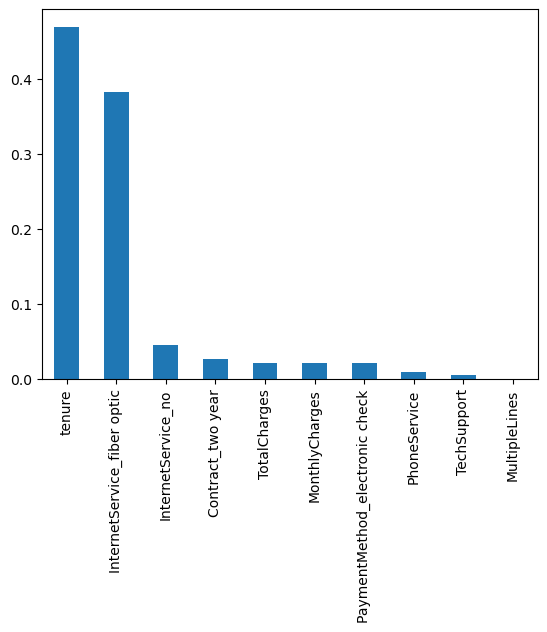

In [19]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4,random_state=42)
dtree.fit(X_train1, y_train1)
y_pred_dtree = dtree.predict(X_test1)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test1, y_pred_dtree)
confusion=confusion_matrix(y_test1,y_pred_dtree)
report=classification_report(y_test1,y_pred_dtree)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 13))
plot_tree(dtree, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True,fontsize=8)
plt.show()


feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='bar')

In [20]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1,class_weight='balanced',oob_score=True)
rf.fit(X_train2, y_train2)
y_pred_rf = rf.predict(X_test2)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test2, y_pred_rf)
confusion=confusion_matrix(y_test2,y_pred_rf)
report=classification_report(y_test2,y_pred_rf)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

print("OOB Score:", rf.oob_score_)

Accuracy: 0.7927608232789212

Confusion Matrix:
 [[931 104]
 [188 186]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1035
         1.0       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

OOB Score: 0.7903798367057153


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

rf = RandomForestClassifier(
    n_estimators=200,  # 起點
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 8, 12, 16, 20],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 4, 8, 16, 32],
    "max_features": ["sqrt", "log2", 0.5, 0.7, 1.0],
    "class_weight": ["balanced", "balanced_subsample"],
    "bootstrap": [True]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=30, scoring="f1", cv=cv, n_jobs=-1, random_state=42, verbose=0
)
search.fit(X_train2, y_train2)

best_rf = search.best_estimator_


In [22]:
y_pred_rf_new = best_rf.predict(X_test2)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test2, y_pred_rf_new)
confusion=confusion_matrix(y_test2,y_pred_rf_new)
report=classification_report(y_test2,y_pred_rf_new)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

print("OOB Score:", best_rf.oob_score_)

Accuracy: 0.7622427253371186

Confusion Matrix:
 [[785 250]
 [ 85 289]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1035
         1.0       0.54      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

OOB Score: 0.768370607028754


In [23]:
from sklearn.metrics import precision_recall_curve
y_prob = best_rf.predict_proba(X_test2)
y_prob = y_prob[:, 1]
prec,rec,thr=precision_recall_curve(y_test2,y_prob)

def f1_pos(p,r):
    return 2*p*r/(p+r+1e-16)

best_f1,best_t=-1,0.5

for p,r,t in zip(prec[:-1],rec[:-1],thr):
    f1=f1_pos(p,r)
    if f1>best_f1:
        best_f1=f1
        best_t=t
print(f"\nBest F1(+)≈{best_f1:.3f} at threshold≈{best_t:.3f}")

y_pred_best=(y_prob >= best_t).astype(int)
print('accuracy',accuracy_score(y_test2,y_pred_best))
print("\nConfusion:\n", confusion_matrix(y_test2, y_pred_best))
print('\nreport\n',classification_report(y_test2, y_pred_best, digits=3))


Best F1(+)≈0.648 at threshold≈0.455
accuracy 0.758694109297374

Confusion:
 [[756 279]
 [ 61 313]]

report
               precision    recall  f1-score   support

         0.0      0.925     0.730     0.816      1035
         1.0      0.529     0.837     0.648       374

    accuracy                          0.759      1409
   macro avg      0.727     0.784     0.732      1409
weighted avg      0.820     0.759     0.772      1409



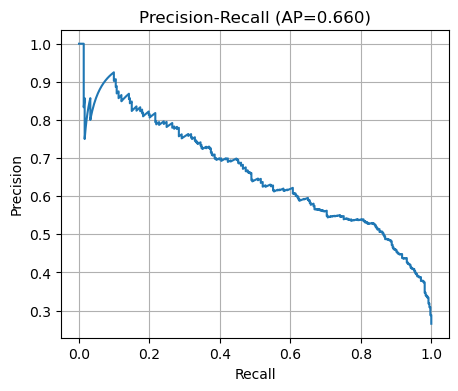

In [24]:
from sklearn.metrics import average_precision_score
ap = average_precision_score(y_test2, y_prob)
plt.figure(figsize=(5,4))
plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.grid(True)
plt.title(f"Precision-Recall (AP={ap:.3f})")
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_rf_feature_importance(model, X, top_n=15, figsize=(7, 6), savepath=None):
    """
    針對 RandomForestClassifier 畫特徵重要度 Top-N 長條圖。
    - model: 已訓練好的隨機森林
    - X: 用來提供欄位名稱（可用 X_train 或 X_test）
    - top_n: 取前 N 個重要特徵
    - savepath: 若給路徑，會將圖另存
    """
    importances = getattr(model, "feature_importances_", None)
    if importances is None:
        raise ValueError("這個模型沒有 feature_importances_ 屬性，請確認是隨機森林或決策樹類。")

    # 取得特徵名稱
    if hasattr(X, "columns"):
        feat_names = list(X.columns)
    else:
        feat_names = [f"f{i}" for i in range(len(importances))]

    imp = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(top_n)

    plt.figure(figsize=figsize)
    plt.barh(imp.index[::-1], imp.values[::-1])
    plt.title(f"Random Forest Feature Importance (Top {top_n})")
    plt.xlabel("Importance")
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()


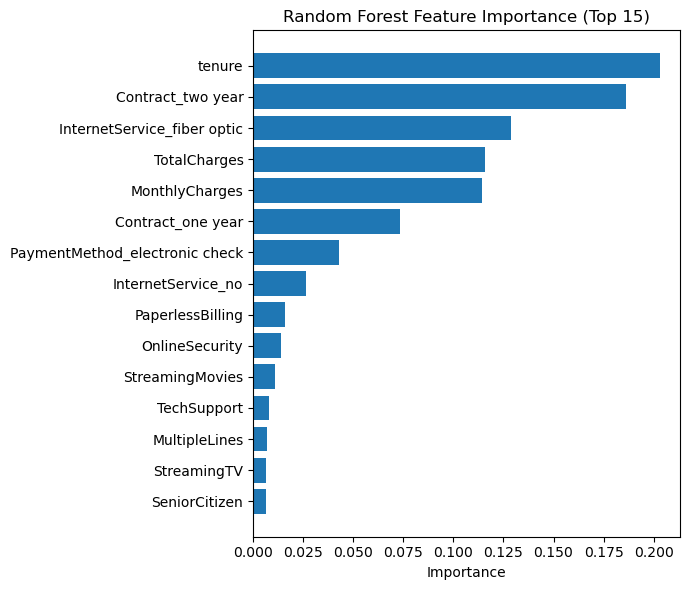

In [26]:
plot_rf_feature_importance(best_rf, X_train2, top_n=15)


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

def evaluate_at_threshold(model, X, y, threshold=0.5, title_suffix="", savepath=None):
    """
    用自訂閾值產生預測 → 畫混淆矩陣 → 印出 accuracy / report。
    - model: 已訓練模型（需支援 predict_proba）
    - X, y: 測試資料與標籤
    - threshold: 分類閾值（預設 0.5）
    - title_suffix: 圖表標題後綴（可放 'th=0.455'）
    - savepath: 若給路徑，會將混淆矩陣圖另存
    """
    # 1) 機率 → 閾值切分類
    proba = model.predict_proba(X)[:, 1]
    y_pred = (proba >= threshold).astype(int)

    # 2) 混淆矩陣
    cm = confusion_matrix(y, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

    fig, ax = plt.subplots(figsize=(5.2, 5))
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(f"Confusion Matrix {title_suffix}".strip())
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()

    # 3) 指標列印
    acc = accuracy_score(y, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report:\n",
          classification_report(y, y_pred, digits=3))
    return {"accuracy": acc, "cm": cm, "y_pred": y_pred}


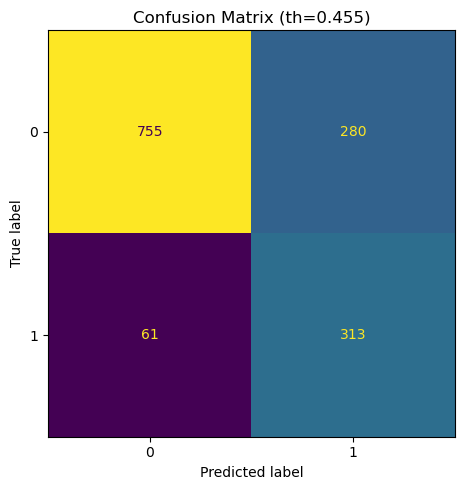

Accuracy: 0.7580

Classification Report:
               precision    recall  f1-score   support

         0.0      0.925     0.729     0.816      1035
         1.0      0.528     0.837     0.647       374

    accuracy                          0.758      1409
   macro avg      0.727     0.783     0.732      1409
weighted avg      0.820     0.758     0.771      1409



In [28]:
res = evaluate_at_threshold(best_rf, X_test2, y_test2, threshold=0.455, title_suffix="(th=0.455)")


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def compare_thresholds(model, X, y, thresholds=[0.5, 0.455], labels=None, savepath=None):
    """
    比較多個閾值下的 precision / recall / f1 分數，畫成對照柱狀圖。
    - model: 已訓練模型
    - X, y: 測試資料與標籤
    - thresholds: 要比較的閾值列表
    - labels: 閾值名稱（如 ["Default 0.5", "Best 0.455"]）
    - savepath: 若給路徑，會將圖另存
    """
    metrics_names = ["Precision", "Recall", "F1-score"]
    scores = []

    for th in thresholds:
        y_pred = (model.predict_proba(X)[:, 1] >= th).astype(int)
        scores.append([
            precision_score(y, y_pred),
            recall_score(y, y_pred),
            f1_score(y, y_pred)
        ])

    scores = np.array(scores)  # shape: (len(thresholds), 3)

    if labels is None:
        labels = [f"th={t}" for t in thresholds]

    # 畫圖
    x = np.arange(len(metrics_names))
    bar_width = 0.35
    fig, ax = plt.subplots(figsize=(7, 5))

    for i, label in enumerate(labels):
        ax.bar(x + i * bar_width, scores[i], width=bar_width, label=label)

    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(metrics_names)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Score")
    ax.set_title("Model Metrics by Threshold")
    ax.legend()
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()

    return scores


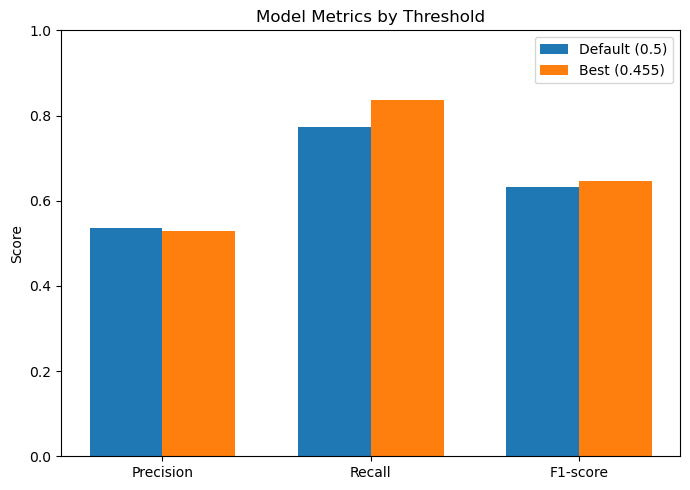

array([[0.53617811, 0.77272727, 0.63307777],
       [0.52782462, 0.8368984 , 0.64736298]])

In [30]:
compare_thresholds(
    best_rf,
    X_test2,
    y_test2,
    thresholds=[0.5, 0.455],
    labels=["Default (0.5)", "Best (0.455)"]
)


In [31]:
print("Best params (Randomized):", search.best_params_)
print("Best CV AUC:", search.best_score_)

Best params (Randomized): {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 8, 'class_weight': 'balanced_subsample', 'bootstrap': True}
Best CV AUC: 0.6354231933913782


In [32]:
from sklearn.model_selection import GridSearchCV

gf=RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1,oob_score=True)

param_grid={
    'n_estimators': [150,200,250],
    'max_depth': [6,8,10],
    'min_samples_split': [18,20,22],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [0.5],
    'class_weight': ['balanced_subsample'],
    'bootstrap': [True]
}

gs=GridSearchCV(
    estimator=gf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=0,
)

gs.fit(X_train2,y_train2)

print('Best params (Grid):',gs.best_params_)
print('Best CV AUC:',gs.best_score_)

best_rf_finetuned=gs.best_estimator_

Best params (Grid): {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 200}
Best CV AUC: 0.6352453866273858


In [33]:
y_pred_rf_new2=best_rf_finetuned.predict(X_test2)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test2, y_pred_rf_new2)
confusion=confusion_matrix(y_test2,y_pred_rf_new2)
report=classification_report(y_test2,y_pred_rf_new2)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy: 0.7579843860894251

Confusion Matrix:
 [[761 274]
 [ 67 307]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1035
         1.0       0.53      0.82      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



In [34]:
y_prob_rf_new2=best_rf_finetuned.predict_proba(X_test2)[:,1]

prec1,rec1,thr1=precision_recall_curve(y_test2,y_prob_rf_new2)

best_f1=-1
best_t=0.5
for p1,r1,t1 in zip(prec1[:-1],rec1[:-1],thr1):
    f1=f1_pos(p1,r1)
    if f1>best_f1:
        best_f1=f1
        best_t=t1
print(f"\nBest F1(+)≈{best_f1:.3f} at threshold≈{best_t:.3f}")



Best F1(+)≈0.645 at threshold≈0.503


In [35]:
y_pred_final=(y_prob_rf_new2 >= best_t).astype(int)
print('accuracy',accuracy_score(y_test2,y_pred_final))
print("\nConfusion:\n", confusion_matrix(y_test2, y_pred_final))
print('\nreport\n',classification_report(y_test2, y_pred_final, digits=3))

accuracy 0.7601135557132718

Confusion:
 [[764 271]
 [ 67 307]]

report
               precision    recall  f1-score   support

         0.0      0.919     0.738     0.819      1035
         1.0      0.531     0.821     0.645       374

    accuracy                          0.760      1409
   macro avg      0.725     0.780     0.732      1409
weighted avg      0.816     0.760     0.773      1409



In [36]:
# 固定 recall 門檻
target_recall = 0.82  

best_prec = -1
best_t2 = 0.5

for p1, r1, t1 in zip(prec1[1:], rec1[1:], thr1):
    if r1 >= target_recall and p1 > best_prec:
        best_prec = p1
        best_t2 = t1

print(f"最佳 Precision≈{best_prec:.3f} at threshold≈{best_t2:.3f} (recall≥{target_recall})")


最佳 Precision≈0.531 at threshold≈0.501 (recall≥0.82)


In [37]:
y_pred_final2=(y_prob_rf_new2 >= best_t2).astype(int)
print('accuracy',accuracy_score(y_test2,y_pred_final2))
print("\nConfusion:\n", confusion_matrix(y_test2, y_pred_final2))
print('\nreport\n',classification_report(y_test2, y_pred_final2, digits=3))

accuracy 0.759403832505323

Confusion:
 [[763 272]
 [ 67 307]]

report
               precision    recall  f1-score   support

         0.0      0.919     0.737     0.818      1035
         1.0      0.530     0.821     0.644       374

    accuracy                          0.759      1409
   macro avg      0.725     0.779     0.731      1409
weighted avg      0.816     0.759     0.772      1409



In [38]:
import matplotlib.pyplot as plt
import numpy as np

def plot_models_metrics(metrics, title="Comparison of model indicators", savepath=None):
    """
    以群組長條圖比較多個模型的 Precision / Recall / F1。
    metrics: dict
        {
          'Original': {'precision':0.64, 'recall':0.50, 'f1':0.56},
          'RandomizedSearchCV': {'precision':0.53, 'recall':0.84, 'f1':0.65},
          'GridSearchCV': {'precision':0.63, 'recall':0.75, 'f1':0.64}
        }
    """
    model_names = list(metrics.keys())
    P = [metrics[m]['precision'] for m in model_names]
    R = [metrics[m]['recall']    for m in model_names]
    F = [metrics[m]['f1']        for m in model_names]

    x = np.arange(len(model_names))
    w = 0.26

    fig, ax = plt.subplots(figsize=(8, 6))
    b1 = ax.bar(x - w, P, width=w, label='Precision')
    b2 = ax.bar(x      , R, width=w, label='Recall')
    b3 = ax.bar(x + w,  F, width=w, label='F1-score')

    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=0)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    # 在柱上加數值
    for bars in (b1, b2, b3):
        for bar in bars:
            h = bar.get_height()
            ax.annotate(f"{h:.3f}", xy=(bar.get_x()+bar.get_width()/2, h),
                        xytext=(0, 4), textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()



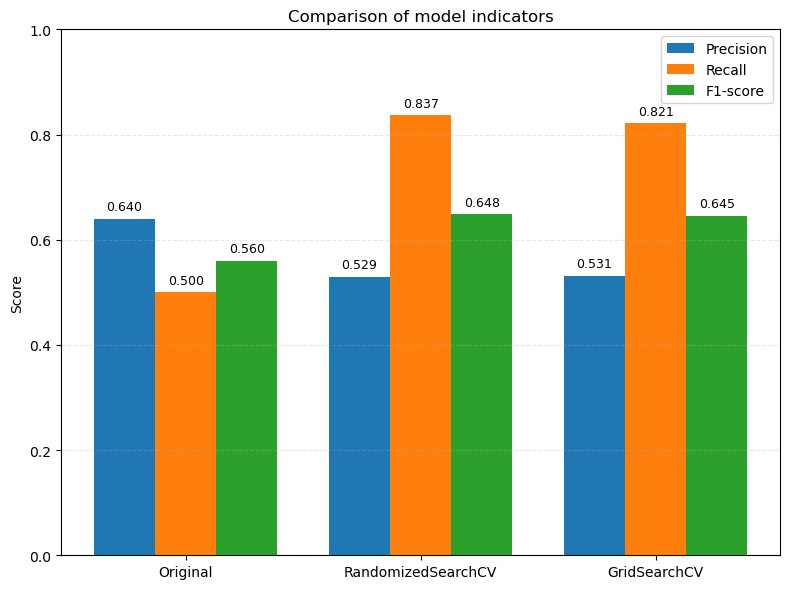

In [39]:


metrics_p = {
    'Original':     {'precision':0.640, 'recall':0.500, 'f1':0.560},
    'RandomizedSearchCV': {'precision':0.529, 'recall':0.837, 'f1':0.648},
    'GridSearchCV':       {'precision':0.531, 'recall':0.821, 'f1':0.645},
}
plot_models_metrics(metrics_p)